In [ ]:
import pandas as pd

# Load your dataset from an Excel file
file_path = '/content/Data_Train.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Get information about the dataset
print("\nDataset information:")
print(data.info())

# Summary statistics of numerical features
print("\nSummary statistics:")
print(data.describe())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Check the data types of features
print("\nData types:")
print(data.dtypes)


First few rows of the dataset:
                                        Title           Author  \
0         The Prisoner's Gold (The Hunters 3)   Chris Kuzneski   
1          Guru Dutt: A Tragedy in Three Acts     Arun Khopkar   
2                Leviathan (Penguin Classics)    Thomas Hobbes   
3          A Pocket Full of Rye (Miss Marple)  Agatha Christie   
4  LIFE 70 Years of Extraordinary Photography  Editors of Life   

                   Edition             Reviews              Ratings  \
0  Paperback,– 10 Mar 2016  4.0 out of 5 stars   8 customer reviews   
1   Paperback,– 7 Nov 2012  3.9 out of 5 stars  14 customer reviews   
2  Paperback,– 25 Feb 1982  4.8 out of 5 stars   6 customer reviews   
3   Paperback,– 5 Oct 2017  4.1 out of 5 stars  13 customer reviews   
4  Hardcover,– 10 Oct 2006  5.0 out of 5 stars    1 customer review   

                                            Synopsis  \
0  THE HUNTERS return in their third brilliant no...   
1  A layered portrait of a troubl

In [ ]:
# Extracting the year from the 'Edition' column and creating a new 'Year' column
data['Year'] = data['Edition'].str.extract(r'(\d{4})', expand=False)

# Convert 'Year' to datetime format
data['Year'] = pd.to_datetime(data['Year'], errors='coerce')

# Drop the original 'Edition' column
data.drop('Edition', axis=1, inplace=True)


In [ ]:
# Removing " customer reviews" from 'Ratings' and converting to numeric
data['Ratings'] = data['Ratings'].str.replace(' customer reviews', '')

# Convert to numeric, handling errors by coercing to NaN
data['Ratings'] = pd.to_numeric(data['Ratings'], errors='coerce')


In [ ]:
# One-hot encoding for 'Genre' and 'BookCategory'
data = pd.get_dummies(data, columns=['Genre', 'BookCategory'], drop_first=True)


In [ ]:
# Extracting the number of authors from the 'Author' column
data['Num_Authors'] = data['Author'].apply(lambda x: len(str(x).split(',')))

# Extracting the length of the book title
data['Title_Length'] = data['Title'].apply(lambda x: len(str(x)))

# Dropping the original 'Title' and 'Author' columns
data.drop(['Title', 'Author'], axis=1, inplace=True)


In [ ]:
# Extracting the word count from the 'Synopsis' column
data['Synopsis_Word_Count'] = data['Synopsis'].apply(lambda x: len(str(x).split()))

# Dropping the original 'Synopsis' column
data.drop('Synopsis', axis=1, inplace=True)


In [ ]:
import numpy as np
# Log-transforming the 'Price' column to handle skewness
data['Log_Price'] = data['Price'].apply(lambda x: np.log1p(x))

# Dropping the original 'Price' column
data.drop('Price', axis=1, inplace=True)


In [ ]:
# Drop any remaining text columns
text_columns = data.select_dtypes(include='object').columns
data.drop(text_columns, axis=1, inplace=True)


In [ ]:
# Display the first few rows and information about the modified dataset
print("First few rows of the modified dataset:")
print(data.head())

# Get information about the modified dataset
print("\nModified dataset information:")
print(data.info())


First few rows of the modified dataset:
   Reviews  Ratings       Year  Genre_Action & Adventure (Books)  \
0      4.0      8.0 2016-01-01                                 1   
1      3.9     14.0 2012-01-01                                 0   
2      4.8      6.0 1982-01-01                                 0   
3      4.1     13.0 2017-01-01                                 0   
4      5.0      NaN 2006-01-01                                 0   

   Genre_Active Outdoor Pursuits (Books)  Genre_Aeronautical Engineering  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   

   Genre_Aesthetics  Genre_Agriculture & Farming (Books)  \
0                 0               

### Explore Relationships:

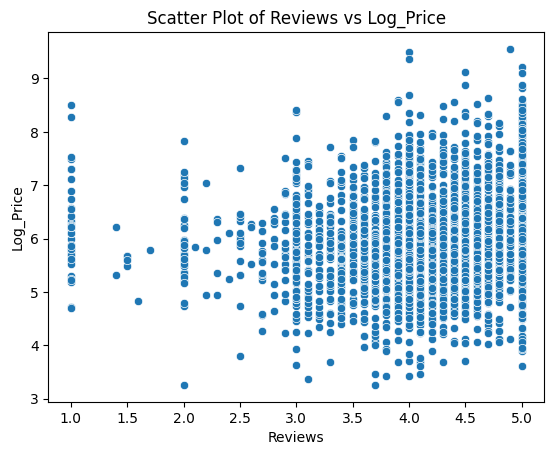

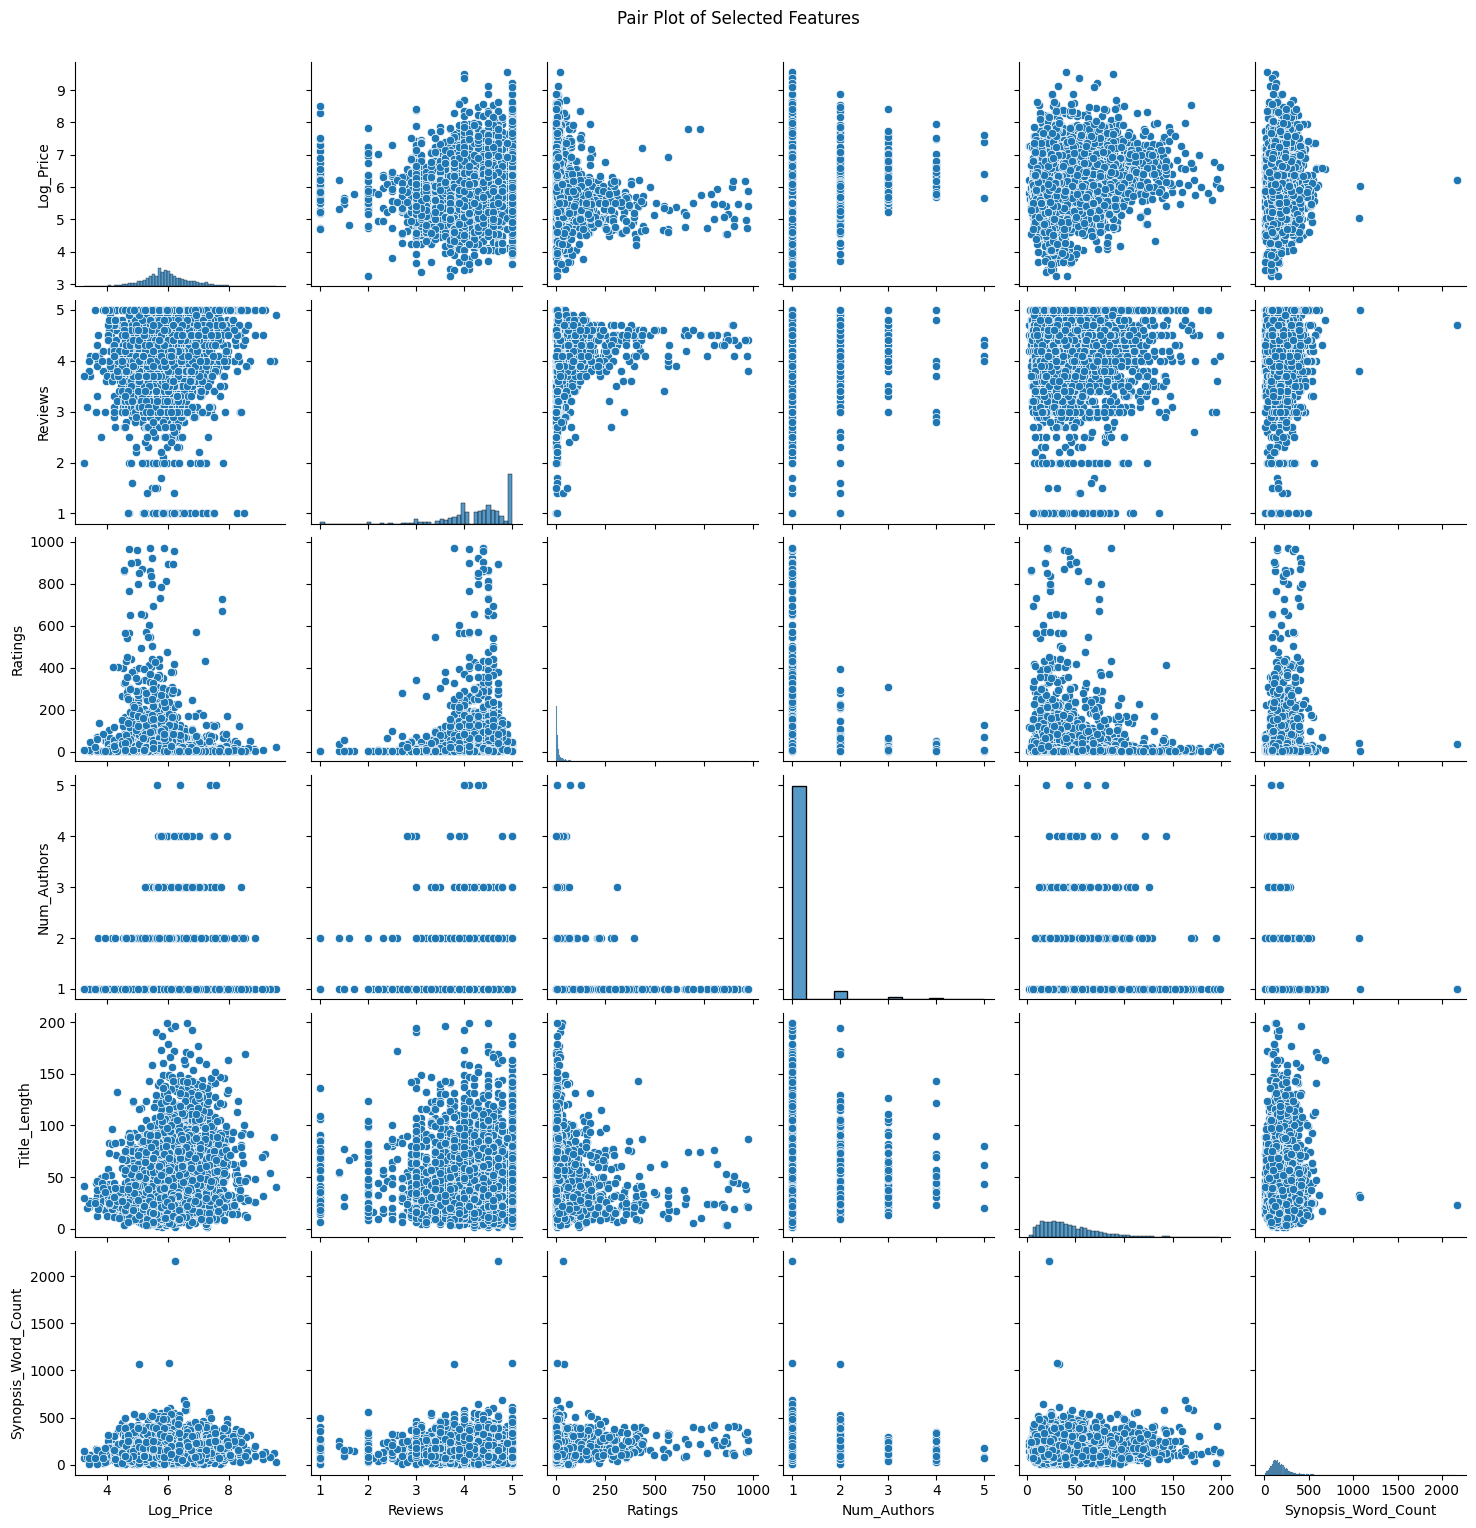

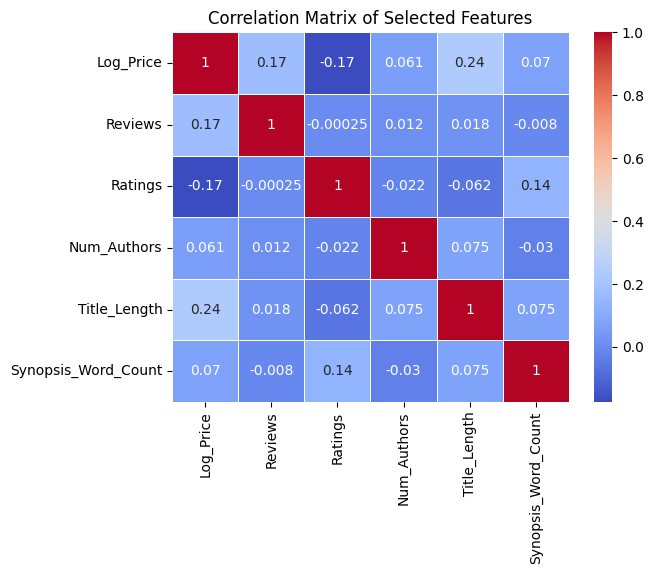

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of 'Reviews' and 'Log_Price'
sns.scatterplot(x='Reviews', y='Log_Price', data=data)
plt.title('Scatter Plot of Reviews vs Log_Price')
plt.show()

# Pair plot for selected features
selected_features = ['Log_Price', 'Reviews', 'Ratings', 'Num_Authors', 'Title_Length', 'Synopsis_Word_Count']
sns.pairplot(data[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Correlation matrix
corr_matrix = data[selected_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()


### Check for Outliers:

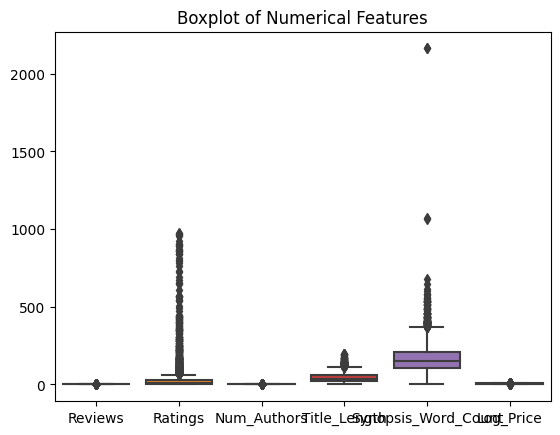

In [ ]:
# Boxplot for numerical features
numerical_features = ['Reviews', 'Ratings', 'Num_Authors', 'Title_Length', 'Synopsis_Word_Count', 'Log_Price']
sns.boxplot(data[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.show()


In [ ]:
# Adjust 'Ratings' to a scale of 0 to 10
data['Ratings'] = data['Ratings'] / 20

# Split the data into features (X) and target variable (y)
X = data.drop('Log_Price', axis=1)
y = data['Log_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill NaN values with a default value (you can adjust this based on your data)
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.5815785262085804e+18
R-squared: -2.901825800449273e+18


In [ ]:
# Check for NaN values in training and test data
print("NaN values in training data:")
print(X_train.isnull().sum())

print("\nNaN values in test data:")
print(X_test.isnull().sum())


NaN values in training data:
Reviews                                  0
Ratings                                  0
Year                                     0
Genre_Action & Adventure (Books)         0
Genre_Active Outdoor Pursuits (Books)    0
                                        ..
BookCategory_Romance                     0
BookCategory_Sports                      0
Num_Authors                              0
Title_Length                             0
Synopsis_Word_Count                      0
Length: 350, dtype: int64

NaN values in test data:
Reviews                                  0
Ratings                                  0
Year                                     0
Genre_Action & Adventure (Books)         0
Genre_Active Outdoor Pursuits (Books)    0
                                        ..
BookCategory_Romance                     0
BookCategory_Sports                      0
Num_Authors                              0
Title_Length                             0
Synopsis_Word_Co

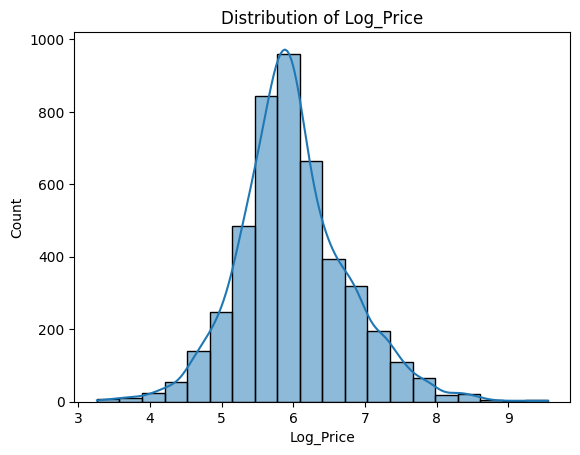

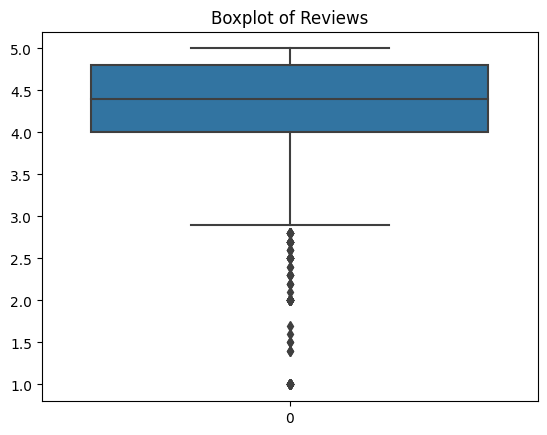

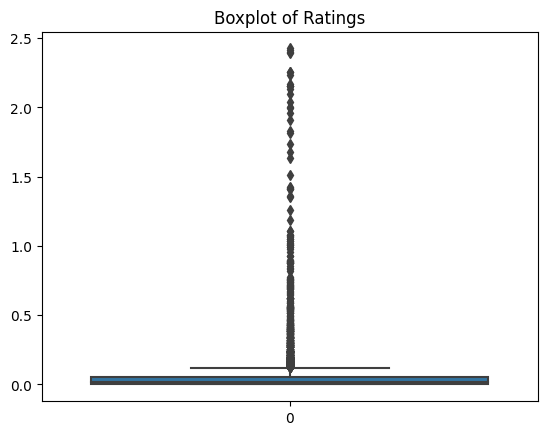

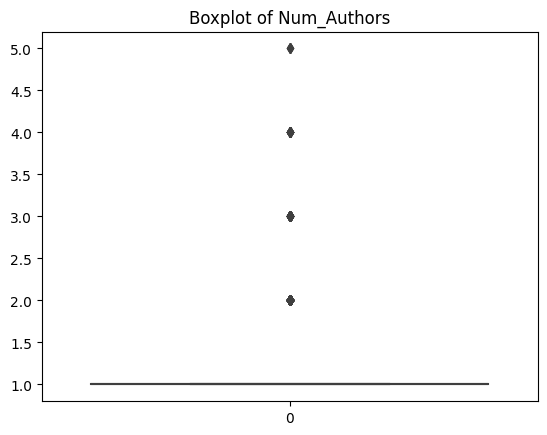

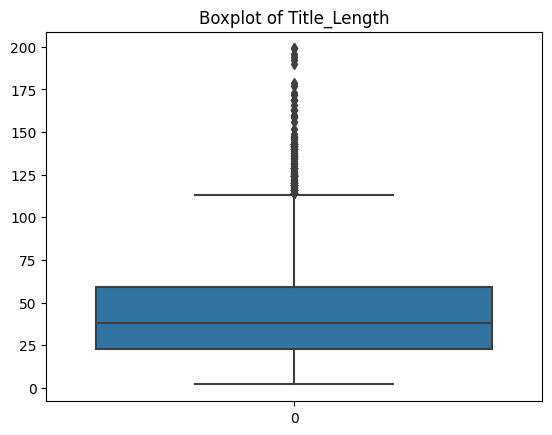

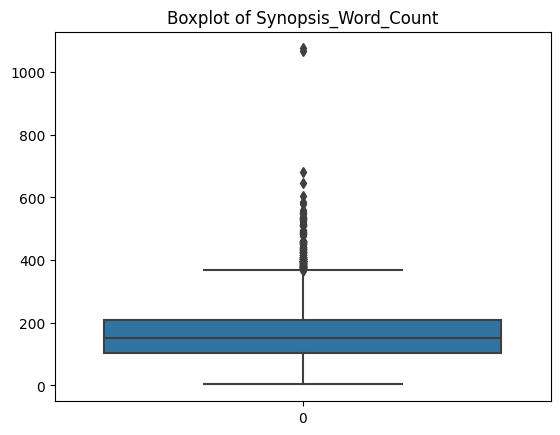

In [ ]:
# Check the distribution of 'Log_Price'
sns.histplot(y_train, bins=20, kde=True)
plt.title('Distribution of Log_Price')
plt.show()

# Check for extreme values in numerical features
numerical_features = ['Reviews', 'Ratings', 'Num_Authors', 'Title_Length', 'Synopsis_Word_Count']
for feature in numerical_features:
    sns.boxplot(X_train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


## feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale numerical features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = model.predict(X_test_scaled)

# Evaluate the model
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f'Mean Squared Error (Scaled): {mse_scaled}')
print(f'R-squared (Scaled): {r2_scaled}')


Mean Squared Error (Scaled): 2.2317181977102926e+24
R-squared (Scaled): -4.0946796748515087e+24


### feature scaling:  Lesso

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Initialize LassoCV model
lasso_model = LassoCV()

# Initialize SelectFromModel with Lasso
feature_selector = SelectFromModel(lasso_model)

# Fit and transform on the scaled training data
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)

# Transform the test data
X_test_selected = feature_selector.transform(X_test_scaled)

# Get selected feature names
selected_feature_names = X.columns[feature_selector.get_support()]

# Print selected features
print("Selected Features:")
print(selected_feature_names)

# Initialize the linear regression model on selected features
model_selected = LinearRegression()

# Fit the model on the selected features of the scaled training data
model_selected.fit(X_train_selected, y_train)

# Make predictions on the selected features of the scaled test data
y_pred_selected = model_selected.predict(X_test_selected)

# Evaluate the model on selected features
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f'Mean Squared Error (Selected Features): {mse_selected}')
print(f'R-squared (Selected Features): {r2_selected}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21958726583920907, tolerance: 0.21516931822756533
  model = cd_fast.enet_coordinate_descent_gram(


Selected Features:
Index(['Reviews', 'Ratings', 'Year', 'Genre_Action & Adventure (Books)',
       'Genre_Algebra & Trigonometry', 'Genre_Algorithms',
       'Genre_American Literature', 'Genre_Anatomy & Physiology',
       'Genre_Anthologies (Books)', 'Genre_Architecture (Books)',
       ...
       'BookCategory_Computing, Internet & Digital Media',
       'BookCategory_Crime, Thriller & Mystery', 'BookCategory_Humour',
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'Num_Authors',
       'Title_Length', 'Synopsis_Word_Count'],
      dtype='object', length=154)
Mean Squared Error (Selected Features): 0.3881491975930294
R-squared (Selected Features): 0.28783722253788846


### hyperparameter tuning

In [ ]:
from sklearn.linear_model import Lasso

# Define hyperparameters to tune
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Initialize Lasso model
lasso_model = Lasso()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV on the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Initialize Lasso model with best alpha
lasso_model_best = Lasso(alpha=best_alpha)

# Fit the model on the scaled training data
lasso_model_best.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_best = lasso_model_best.predict(X_test_scaled)

# Evaluate the model with best hyperparameters
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Alpha: {best_alpha}')
print(f'Mean Squared Error (Best Model): {mse_best}')
print(f'R-squared (Best Model): {r2_best}')


Best Alpha: 0.01
Mean Squared Error (Best Model): 0.37771721969257444
R-squared (Best Model): 0.30697745624719763


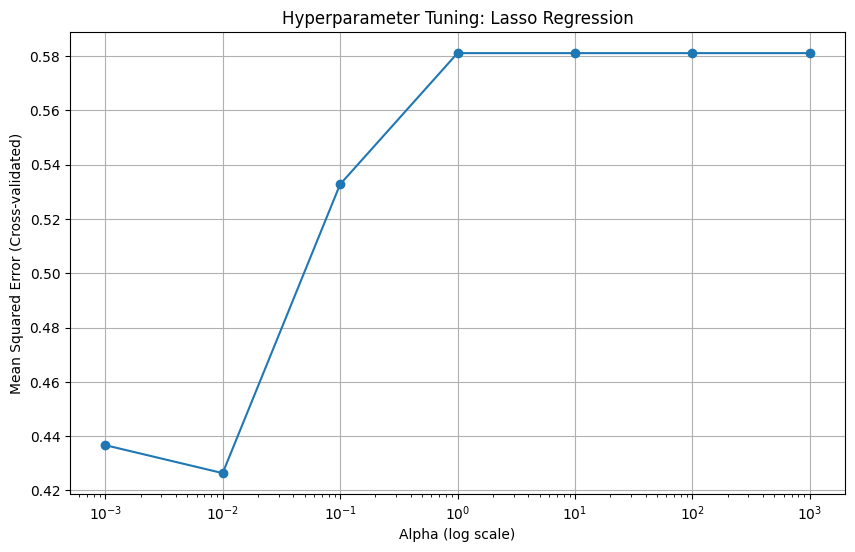

In [ ]:
import matplotlib.pyplot as plt

# Get alpha values and corresponding cross-validated MSE scores
alphas = grid_search.cv_results_['param_alpha'].data.astype(float)
mse_scores = -grid_search.cv_results_['mean_test_score']

# Plot the relationship between alpha and MSE
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_scores, marker='o', linestyle='-')
plt.xscale('log')  # Use a log scale for alpha values
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error (Cross-validated)')
plt.title('Hyperparameter Tuning: Lasso Regression')
plt.grid(True)
plt.show()


### Interaction Terms

In [ ]:
# Create interaction term: Reviews * Ratings
X_train_interact = X_train.copy()
X_test_interact = X_test.copy()

X_train_interact['Reviews_Ratings_Interact'] = X_train_interact['Reviews'] * X_train_interact['Ratings']
X_test_interact['Reviews_Ratings_Interact'] = X_test_interact['Reviews'] * X_test_interact['Ratings']

# Scale the data with the interaction term
scaler_interact = StandardScaler()
X_train_interact_scaled = scaler_interact.fit_transform(X_train_interact)
X_test_interact_scaled = scaler_interact.transform(X_test_interact)

# Initialize the linear regression model
model_interact = LinearRegression()

# Fit the model on the scaled training data with the interaction term
model_interact.fit(X_train_interact_scaled, y_train)

# Make predictions on the scaled test data with the interaction term
y_pred_interact = model_interact.predict(X_test_interact_scaled)

# Evaluate the model with the interaction term
mse_interact = mean_squared_error(y_test, y_pred_interact)
r2_interact = r2_score(y_test, y_pred_interact)

print(f'Mean Squared Error (With Interaction Term): {mse_interact}')
print(f'R-squared (With Interaction Term): {r2_interact}')


Mean Squared Error (With Interaction Term): 6.246235964590571e+22
R-squared (With Interaction Term): -1.1460378588468935e+23


In [ ]:
import pandas as pd

# Convert scaled data arrays back to DataFrames
X_train_interact_scaled_df = pd.DataFrame(X_train_interact_scaled, columns=X_train_interact.columns)
X_test_interact_scaled_df = pd.DataFrame(X_test_interact_scaled, columns=X_test_interact.columns)

# Check for NaN values in the dataset with interaction term
print("NaN values in dataset with interaction term:")
print(X_train_interact_scaled_df.isnull().sum())


NaN values in dataset with interaction term:
Reviews                                  0
Ratings                                  0
Year                                     0
Genre_Action & Adventure (Books)         0
Genre_Active Outdoor Pursuits (Books)    0
                                        ..
BookCategory_Sports                      0
Num_Authors                              0
Title_Length                             0
Synopsis_Word_Count                      0
Reviews_Ratings_Interact                 0
Length: 351, dtype: int64


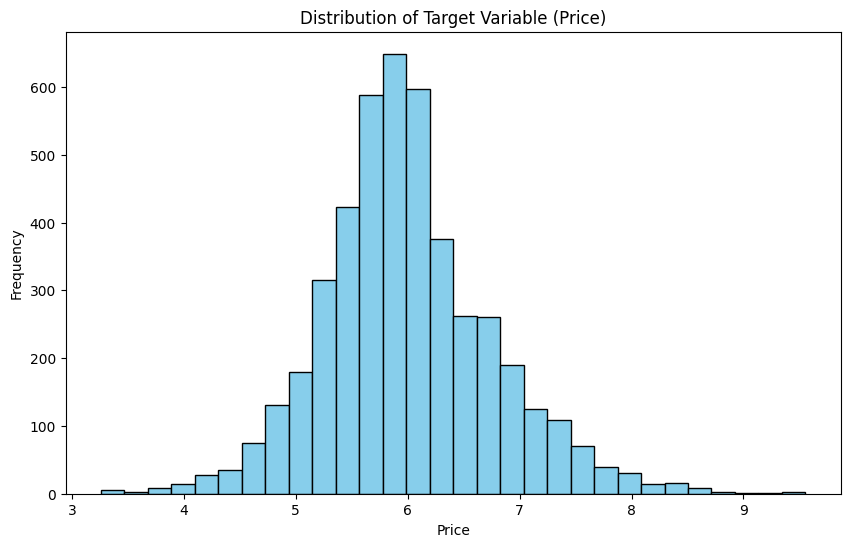

In [ ]:
# Visualize the distribution of the target variable 'Price'
plt.figure(figsize=(10, 6))
plt.hist(y_train, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Target Variable (Price)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Apply natural logarithm transformation to the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Initialize the linear regression model with interaction term
model_interact_log = LinearRegression()

# Fit the model on the scaled training data with log-transformed target variable
model_interact_log.fit(X_train_interact_scaled, y_train_log)

# Make predictions on the scaled test data with log-transformed target variable
y_pred_interact_log = model_interact_log.predict(X_test_interact_scaled)

# Evaluate the model with log-transformed target variable
mse_interact_log = mean_squared_error(y_test_log, y_pred_interact_log)
r2_interact_log = r2_score(y_test_log, y_pred_interact_log)

print(f'Mean Squared Error (With Interaction Term and Log-Transformed Target): {mse_interact_log}')
print(f'R-squared (With Interaction Term and Log-Transformed Target): {r2_interact_log}')


Mean Squared Error (With Interaction Term and Log-Transformed Target): 1.3204131198056328e+21
R-squared (With Interaction Term and Log-Transformed Target): -1.1908766193278845e+23


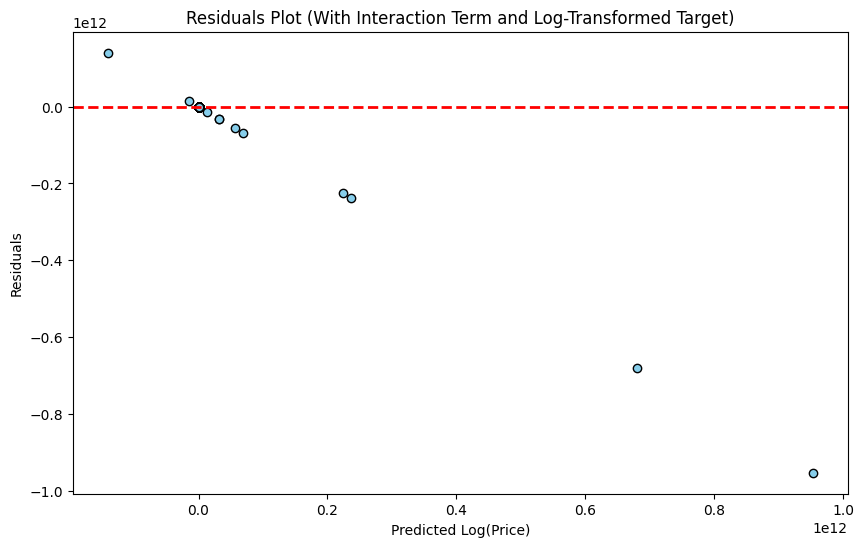

In [ ]:
# Calculate residuals for the model with interaction term and log-transformed target
residuals = y_test_log - y_pred_interact_log

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_interact_log, residuals, color='skyblue', edgecolor='black')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals Plot (With Interaction Term and Log-Transformed Target)')
plt.xlabel('Predicted Log(Price)')
plt.ylabel('Residuals')
plt.show()


### Polynomial Features

In [ ]:
# Check for NaN values in the dataset with polynomial features
print("NaN values in dataset with polynomial features:")
print(pd.DataFrame(X_train_poly_scaled).isnull().sum())


NaN values in dataset with polynomial features:
0      918
1      918
2      918
3      918
4      918
      ... 
365    918
366    918
367    918
368    918
369    918
Length: 370, dtype: int64


In [ ]:
# Check the number of samples in X_train_poly_scaled and y_train_log
print("Number of samples in X_train_poly_scaled:", X_train_poly_scaled.shape[0])
print("Number of samples in y_train_log:", y_train_log.shape[0])


Number of samples in X_train_poly_scaled: 5477
Number of samples in y_train_log: 4559


### binning continuous variables

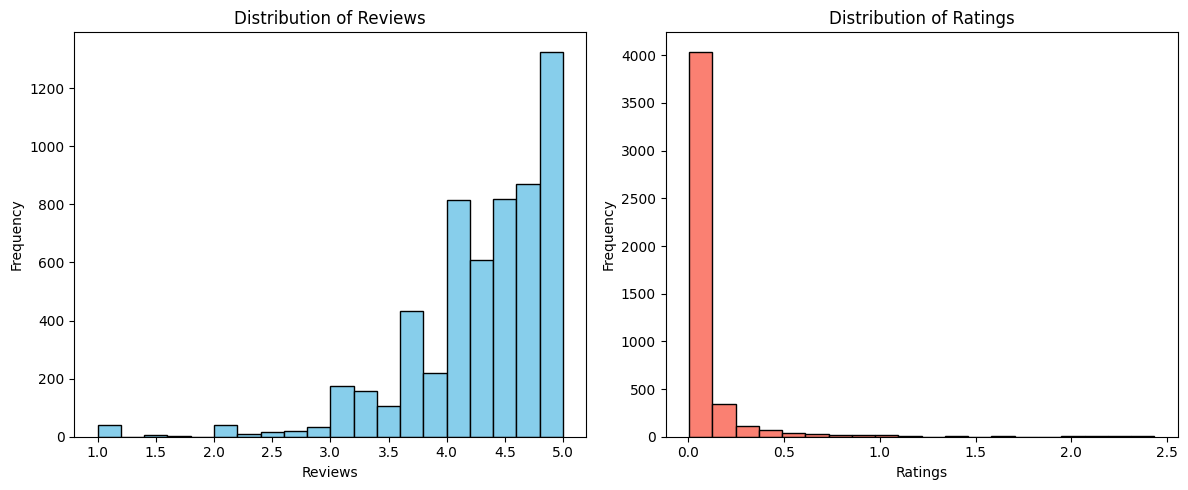

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for 'Reviews' and 'Ratings'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['Reviews'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['Ratings'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Create bins for 'Reviews'
review_bins = [3.5, 4.0, 4.5, 5.0]
review_labels = ['3.5-4.0', '4.0-4.5', '4.5-5.0']
data['Reviews_Bins'] = pd.cut(data['Reviews'], bins=review_bins, labels=review_labels, include_lowest=True)

# Create bins for 'Ratings'
rating_bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25]
rating_labels = ['0-0.05', '0.05-0.1', '0.1-0.15', '0.15-0.2', '0.2-0.25']
data['Ratings_Bins'] = pd.cut(data['Ratings'], bins=rating_bins, labels=rating_labels, right=False)

# Display the modified dataset
data[['Reviews', 'Reviews_Bins', 'Ratings', 'Ratings_Bins']].head()


,Reviews,Reviews_Bins,Ratings,Ratings_Bins
0,4.0,3.5-4.0,0.0200,0-0.05
1,3.9,3.5-4.0,0.0350,0-0.05
2,4.8,4.5-5.0,0.0150,0-0.05
3,4.1,4.0-4.5,0.0325,0-0.05
4,5.0,4.5-5.0,NaN,NaN


### creating some text-based features

In [ ]:
!pip install nltk
!pip install textblob

In [ ]:
# Create the interaction term
X_train['Reviews_Ratings_Interact'] = X_train['Reviews'] * X_train['Ratings']
X_test['Reviews_Ratings_Interact'] = X_test['Reviews'] * X_test['Ratings']


In [ ]:
data.columns

Index(['Reviews', 'Ratings', 'Year', 'Genre_Action & Adventure (Books)',
       'Genre_Active Outdoor Pursuits (Books)',
       'Genre_Aeronautical Engineering', 'Genre_Aesthetics',
       'Genre_Agriculture & Farming (Books)', 'Genre_Algebra & Trigonometry',
       'Genre_Algorithms',
       ...
       'BookCategory_Language, Linguistics & Writing', 'BookCategory_Politics',
       'BookCategory_Romance', 'BookCategory_Sports', 'Num_Authors',
       'Title_Length', 'Synopsis_Word_Count', 'Log_Price', 'Reviews_Bins',
       'Ratings_Bins'],
      dtype='object', length=353)